# Parte 1 - Priorizando Hipóteses

In [315]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from math import factorial
from scipy import stats as st
import math
import plotly.express as px
import datetime as dt
import re
from scipy import stats

In [316]:
df_hypotheses = pd.read_csv('/datasets/hypotheses_us.csv', sep = ';')


In [317]:
df_hypotheses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [318]:
df_hypotheses.head()

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1


In [319]:
df_hypotheses['ICE'] = (df_hypotheses['Impact'] * df_hypotheses['Confidence']) / df_hypotheses['Effort']
print(df_hypotheses[['Hypothesis', 'ICE']].sort_values(by = 'ICE', ascending = False))

                                          Hypothesis        ICE
8  Launch a promotion that gives users discounts ...  16.200000
0  Add two new channels for attracting traffic. T...  13.333333
7  Add a subscription form to all the main pages....  11.200000
6  Show banners with current offers and sales on ...   8.000000
2  Add product recommendation blocks to the store...   7.000000
1  Launch your own delivery service. This will sh...   2.000000
5  Add a customer review page. This will increase...   1.333333
3  Change the category structure. This will incre...   1.125000
4  Change the background color on the main page. ...   1.000000


In [320]:
df_hypotheses['RICE'] = (df_hypotheses['Reach'] * df_hypotheses['Impact'] * df_hypotheses['Confidence']) / df_hypotheses['Effort']
print(df_hypotheses[['Hypothesis', 'RICE']].sort_values(by = 'RICE', ascending = False))

                                          Hypothesis   RICE
7  Add a subscription form to all the main pages....  112.0
2  Add product recommendation blocks to the store...   56.0
0  Add two new channels for attracting traffic. T...   40.0
6  Show banners with current offers and sales on ...   40.0
8  Launch a promotion that gives users discounts ...   16.2
3  Change the category structure. This will incre...    9.0
1  Launch your own delivery service. This will sh...    4.0
5  Add a customer review page. This will increase...    4.0
4  Change the background color on the main page. ...    3.0


- de acordo com resultados dos testes acima, é possível perceber que a sequencias de prioridade muda
- no caso do ICE, a hipótese prioritária é o 8, enquanto no RICE, a hipótese prioritária é a 7
- a sequência do ICE é 8,0,7,6,2,1,5,3,4
- a sequência do RICE é 7,2,0,6,8,3,1,5,4
- somente como menos prioritário eles coencidem

In [321]:
df_orders= pd.read_csv('/datasets/orders_us.csv')

In [322]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


- não possui valores ausentes

In [323]:
df_orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [324]:
df_orders['group'].value_counts()

B    640
A    557
Name: group, dtype: int64

In [325]:
df_orders_duplicated = df_orders[df_orders.duplicated()]
print(df_orders_duplicated)

Empty DataFrame
Columns: [transactionId, visitorId, date, revenue, group]
Index: []


- não existe valores duplicados

In [326]:
df_orders['date'] = df_orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))


In [327]:
df_visitors = pd.read_csv('/datasets/visitors_us.csv')

In [328]:
df_visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


- não possui valores ausentes

In [329]:
df_visitors.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [330]:
df_visitors['group'].value_counts()

B    31
A    31
Name: group, dtype: int64

In [331]:
df_visitors_duplicated = df_visitors[df_visitors.duplicated()]
print(df_visitors_duplicated)

Empty DataFrame
Columns: [date, group, visits]
Index: []


- não possui valores duplicados

In [332]:
df_visitors['date'] = df_visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [333]:
datesGroups = df_orders[['date', 'group']].drop_duplicates()
ordersAggregated = datesGroups.apply(lambda x: df_orders[np.logical_and(df_orders['date'] <= x['date'], df_orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(lambda x: df_visitors[np.logical_and(df_visitors['date'] <= x['date'], df_visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visits' : 'sum'}), axis=1).sort_values(by=['date', 'group'])
print(ordersAggregated)
print(visitorsAggregated)

          date group  transactionId  visitorId  revenue
55  2019-08-01     A             24         20   2356.8
66  2019-08-01     B             21         20   1620.0
175 2019-08-02     A             44         38   3860.3
173 2019-08-02     B             45         43   4243.8
291 2019-08-03     A             68         62   5675.5
..         ...   ...            ...        ...      ...
496 2019-08-29     B            596        544  87343.0
730 2019-08-30     A            545        493  63563.5
690 2019-08-30     B            620        567  90736.3
958 2019-08-31     A            557        503  64554.9
930 2019-08-31     B            640        586  92840.6

[62 rows x 5 columns]
          date group  visits
55  2019-08-01     A     719
66  2019-08-01     B     713
175 2019-08-02     A    1338
173 2019-08-02     B    1294
291 2019-08-03     A    1845
..         ...   ...     ...
496 2019-08-29     B   17708
730 2019-08-30     A   18037
690 2019-08-30     B   18198
958 2019-08-31 

- foi efetuado o agrupadmento por data e por grupo para orders e para visitors

In [334]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
print(cumulativeData.head())

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      24      20   2356.8       719
1 2019-08-01     B      21      20   1620.0       713
2 2019-08-02     A      44      38   3860.3      1338
3 2019-08-02     B      45      43   4243.8      1294
4 2019-08-03     A      68      62   5675.5      1845


- foi feito o acumulado entre orders e visitors

In [335]:
cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][['date', 'revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][['date', 'revenue', 'orders']]

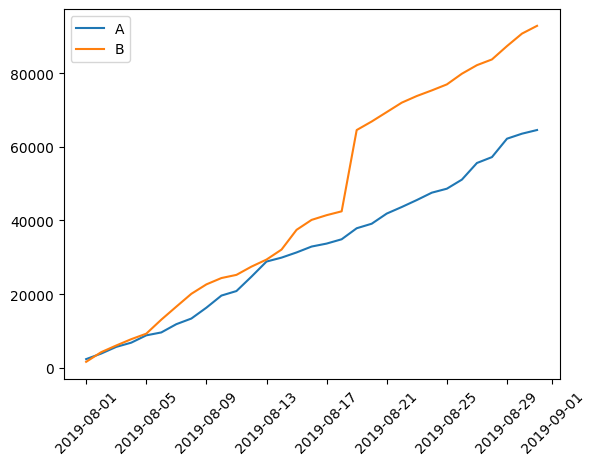

In [336]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label = 'A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label = 'B')
plt.xticks(rotation=45)
plt.legend()

- é possivel perceber que o acumulado do grupo B esta aumentando bem mais que o grupo A e mais rapidamente

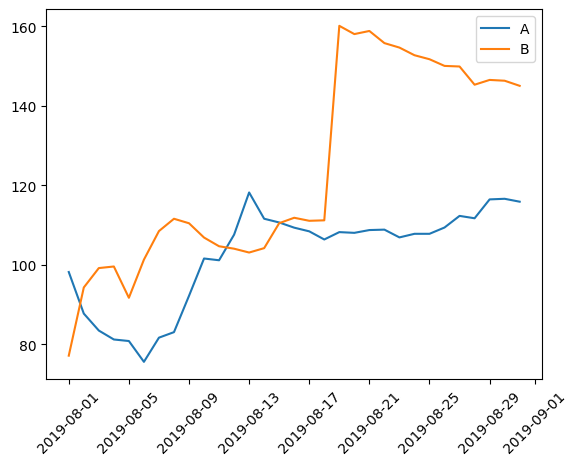

In [337]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.xticks(rotation=45)
plt.legend()

- é possivel ver que os dois tem picos
- em um momento o grupo A ultrapassa o grupo B
- depois do pico o grupo A fica meio estabilizado
- o group B tem varios picos e um grande pico no final
- depois do último pico, que é o maior, o grupo B aparenta estar em queda, porém é preciso de mais dados para saber se isso vai se concretizar

In [338]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on = 'date', right_on = 'date', how = 'left', suffixes = ['A', 'B'])


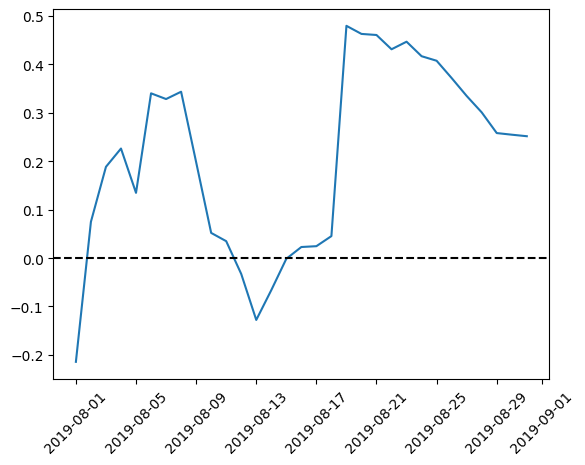

In [339]:
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA']) - 1)
plt.xticks(rotation=45)
plt.axhline(y=0, color='black', linestyle='--')

- em vários pontos, a diferença entre os segmentos apresenta picos
- isso pode indicar a ocorrência de valores atípicos

In [340]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

In [341]:
cumulativeDataA = cumulativeData[cumulativeData['group'] == 'A']
cumulativeDataB = cumulativeData[cumulativeData['group'] == 'B']

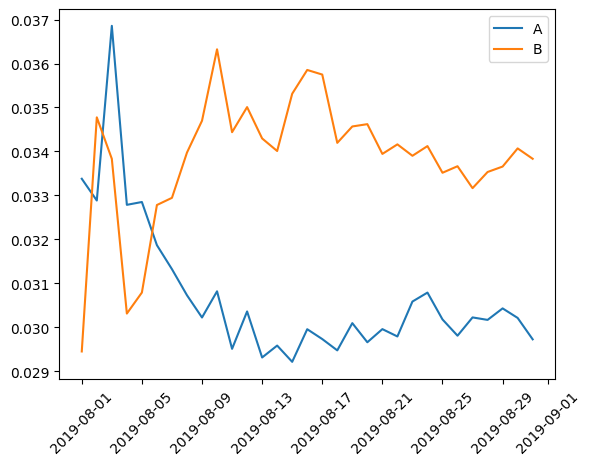

In [342]:
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.xticks(rotation=45)
plt.legend()

- nos dois gráficos é possível perceber que existem muitos picos
- o griupo A tem um grande pico no início e depois uma grande queda, depois fica meio estabilizado
- o grupo B começa bem menor tem um grande pico seguido de uma grande queda, depois mais um grande pico e ele permance ness pico com alogumas variações
- o groupo B está bem maior que o grupo B depois do início invertido

In [343]:
mergedCumulativeConversions = cumulativeDataA[['date', 'conversion']].merge(cumulativeDataB[['date', 'conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

No handles with labels found to put in legend.


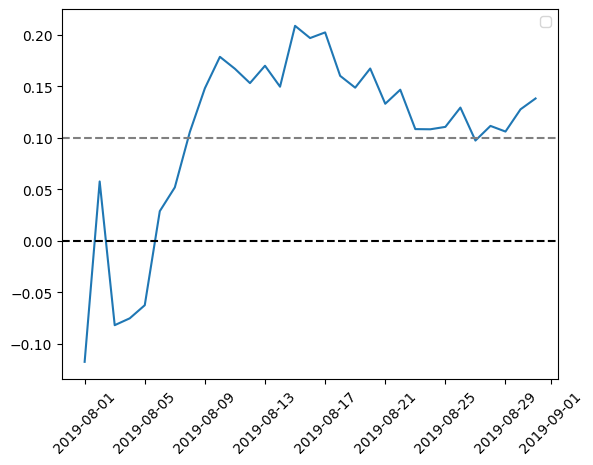

In [344]:
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA'] - 1)
plt.xticks(rotation=45)
plt.legend()
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='gray', linestyle='--')

- a taxa de conversão não está nem um pouco estável
- apesar disso, ele teve um grande pico e aumento na taxa
- teve um pequena queda
- porém, aparenta estar em crescimento novamente
- mesmo com tudo isso, ainda não é possível chegar ainda em alguma conclusão 

In [345]:
ordersByUsers = (df_orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitorId', as_index=False).agg({'transactionId': pd.Series.nunique}))
ordersByUsers.columns = ['userId', 'orders']
print(ordersByUsers.sort_values(by='orders', ascending=False).head(15))

          userId  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5
393   1614305549       4
114    457167155       4
619   2587333274       4
340   1404934699       3
937   3908431265       3


- os maiores pedidos são acima de 8
- existem vários pedidos de 5 para baixo

In [346]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[2. 4.]


- de acordo com o percentiis 95 e 99, o ponto de dados se torna uma anomalia acima de 4

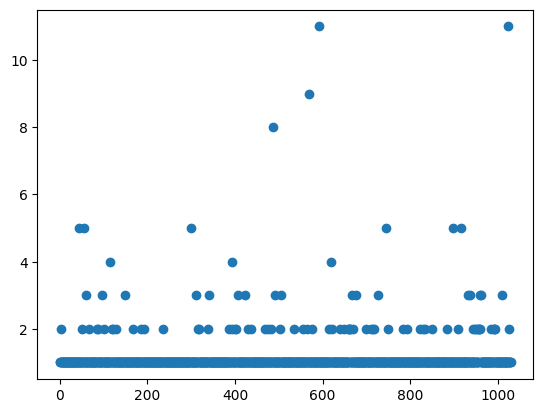

In [347]:
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders'])

- assim como na tabela de quantidade de pedidos, o gráfico mostra que os pontos começam a ficar disperso acima de 8
- porém, isso mostra uma diferença em comparação com os percentis
- com isso, podemos definir o ponto de corte em pedidos acima de 4

In [348]:
print(np.percentile(df_orders['revenue'], [95, 99]))

[435.54  900.904]


- o ponto de dados se tornam uma anomalia acima de 900

In [349]:
ordersByUsersA = df_orders[df_orders['group'] == 'A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']

In [350]:
ordersByUsersB = df_orders[df_orders['group'] == 'B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']

In [351]:
sampleA = pd.concat([ordersByUsersA['orders'], pd.Series(0, index=np.arange(df_visitors[df_visitors['group'] == 'A']['visits'].sum() - len(ordersByUsersA['orders'])), name='orders')], axis=0)

In [352]:
sampleB = pd.concat([ordersByUsersB['orders'], pd.Series(0, index=np.arange(df_visitors[df_visitors['group'] == 'B']['visits'].sum() - len(ordersByUsersA['orders'])), name='orders')], axis=0)

In [353]:
print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

0.020
0.133


- o valor-p é menor que 0.5, então rejeitamos a hipótese nula
- podemos concluir que o volume médio não é diferente entre os grupos
- e o vloume médio do grupo A é maior que do grupo B

In [354]:
print('{0:.3f}'.format(stats.mannwhitneyu(df_orders[df_orders['group'] == 'A']['revenue'], df_orders[df_orders['group'] == 'B']['revenue'])[1]))
print('{0:.3f}'.format(df_orders[df_orders['group'] == 'B']['revenue'].mean()/df_orders[df_orders['group'] == 'B']['revenue'].mean()-1))

0.692
0.000


- o valor-p é consideravelmente maior que 0.05, então não há motivos para rejeitar a hipótese nula
- com isso concluir que o volume médio de pedios seria diferente entre os pedidos
- apesar disso, o volume médio de pedidos do grupo B é o mesmo do grupo A

In [355]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 4]['userId']], axis = 0)
usersWithExpensiveOrders = df_orders[df_orders['revenue'] > 900]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers.head())
print(abnormalUsers.shape)

1099     148427295
949      887908475
744      888512513
1103    1164614297
1136    1307669133
dtype: int64
(15,)


In [356]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(df_visitors[df_visitors['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)

In [357]:
sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(df_visitors[df_visitors['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)

In [358]:
print('{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.014
0.153


- os valores quase não mudaram

In [359]:
print('{0:.3f}'.format(stats.mannwhitneyu(
    df_orders[np.logical_and(
        df_orders['group']=='A',
        np.logical_not(df_orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    df_orders[np.logical_and(
        df_orders['group']=='B',
        np.logical_not(df_orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))

print('{0:.3f}'.format(
    df_orders[np.logical_and(df_orders['group']=='B',np.logical_not(df_orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    df_orders[np.logical_and(
        df_orders['group']=='A',
        np.logical_not(df_orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1))

0.819
-0.006


- o valor-p deu uma aumentada
- agora existe uma diferença entre os grupos, sendo o grupo B maior do que o grupo A
- com isso, é possível concluir que com os dados filtrados e tirando os dados que são anomalias, o grupo B é maior do que o A

# Conclusão

- o grupo A é o grupo líder
- o grupo B é o grupo de teste
- com os resultados dos testes é possível ver que existe diferença entre os grupos
- com os dados filtrados, é possível perceber que o grupo B está melhor do que o grupo A
- como aparetemente está melhorando, o teste deve continuar